# Plots of Sea Ice in CESM-LE simulations

By: Ty Janoski



## Setup

In [1]:
# Import statements

import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
from cartopy.util import add_cyclic_point
import matplotlib.colors as colors
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format = "jpg"

In [2]:
# control sea ice concentration (frac)
sic_ctrl_jan = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/ctrl/b40.1850.cam5-lens.01.SIC.nc')
sic_ctrl_jul = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/ctrl/b40.1850.cam5-lens.07.SIC.nc')

# control sea ice area (m^2)
sia_ctrl_jan = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/ctrl/b40.1850.cam5-lens.01.SIA.nc')
sia_ctrl_jul = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/ctrl/b40.1850.cam5-lens.07.SIA.nc')

# diff sea ice concentration (frac)
sic_diff_jan = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/diff/b40.1850.cam5-lens.01.dSIC.nc')
sic_diff_jul = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/diff/b40.1850.cam5-lens.07.dSIC.nc')

# diff sea ice area (m^2)
sia_diff_abs_jan = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/diff/b40.1850.cam5-lens.01.dSIA_abs.nc')
sia_diff_abs_jul = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/diff/b40.1850.cam5-lens.07.dSIA_abs.nc')

# diff sea ice area (%)
sia_diff_perc_jan = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/diff/b40.1850.cam5-lens.01.dSIA_perc.nc')
sia_diff_perc_jul = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/diff/b40.1850.cam5-lens.07.dSIA_perc.nc')

# diff in SAT (K)
sat_diff_jan = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/diff/b40.1850.cam5-lens.01.dSAT.nc')
sat_diff_jul = xr.open_dataarray('/dx02/janoski/cesm/sea_ice/diff/b40.1850.cam5-lens.07.dSAT.nc')

In [3]:
t_jan,p_jan = stats.ttest_1samp(sia_diff_abs_jan,0,axis=0,nan_policy='raise')
t_jul,p_jul = stats.ttest_1samp(sia_diff_abs_jul,0,axis=0,nan_policy='raise')

# Plots

### Sea ice area vs. time

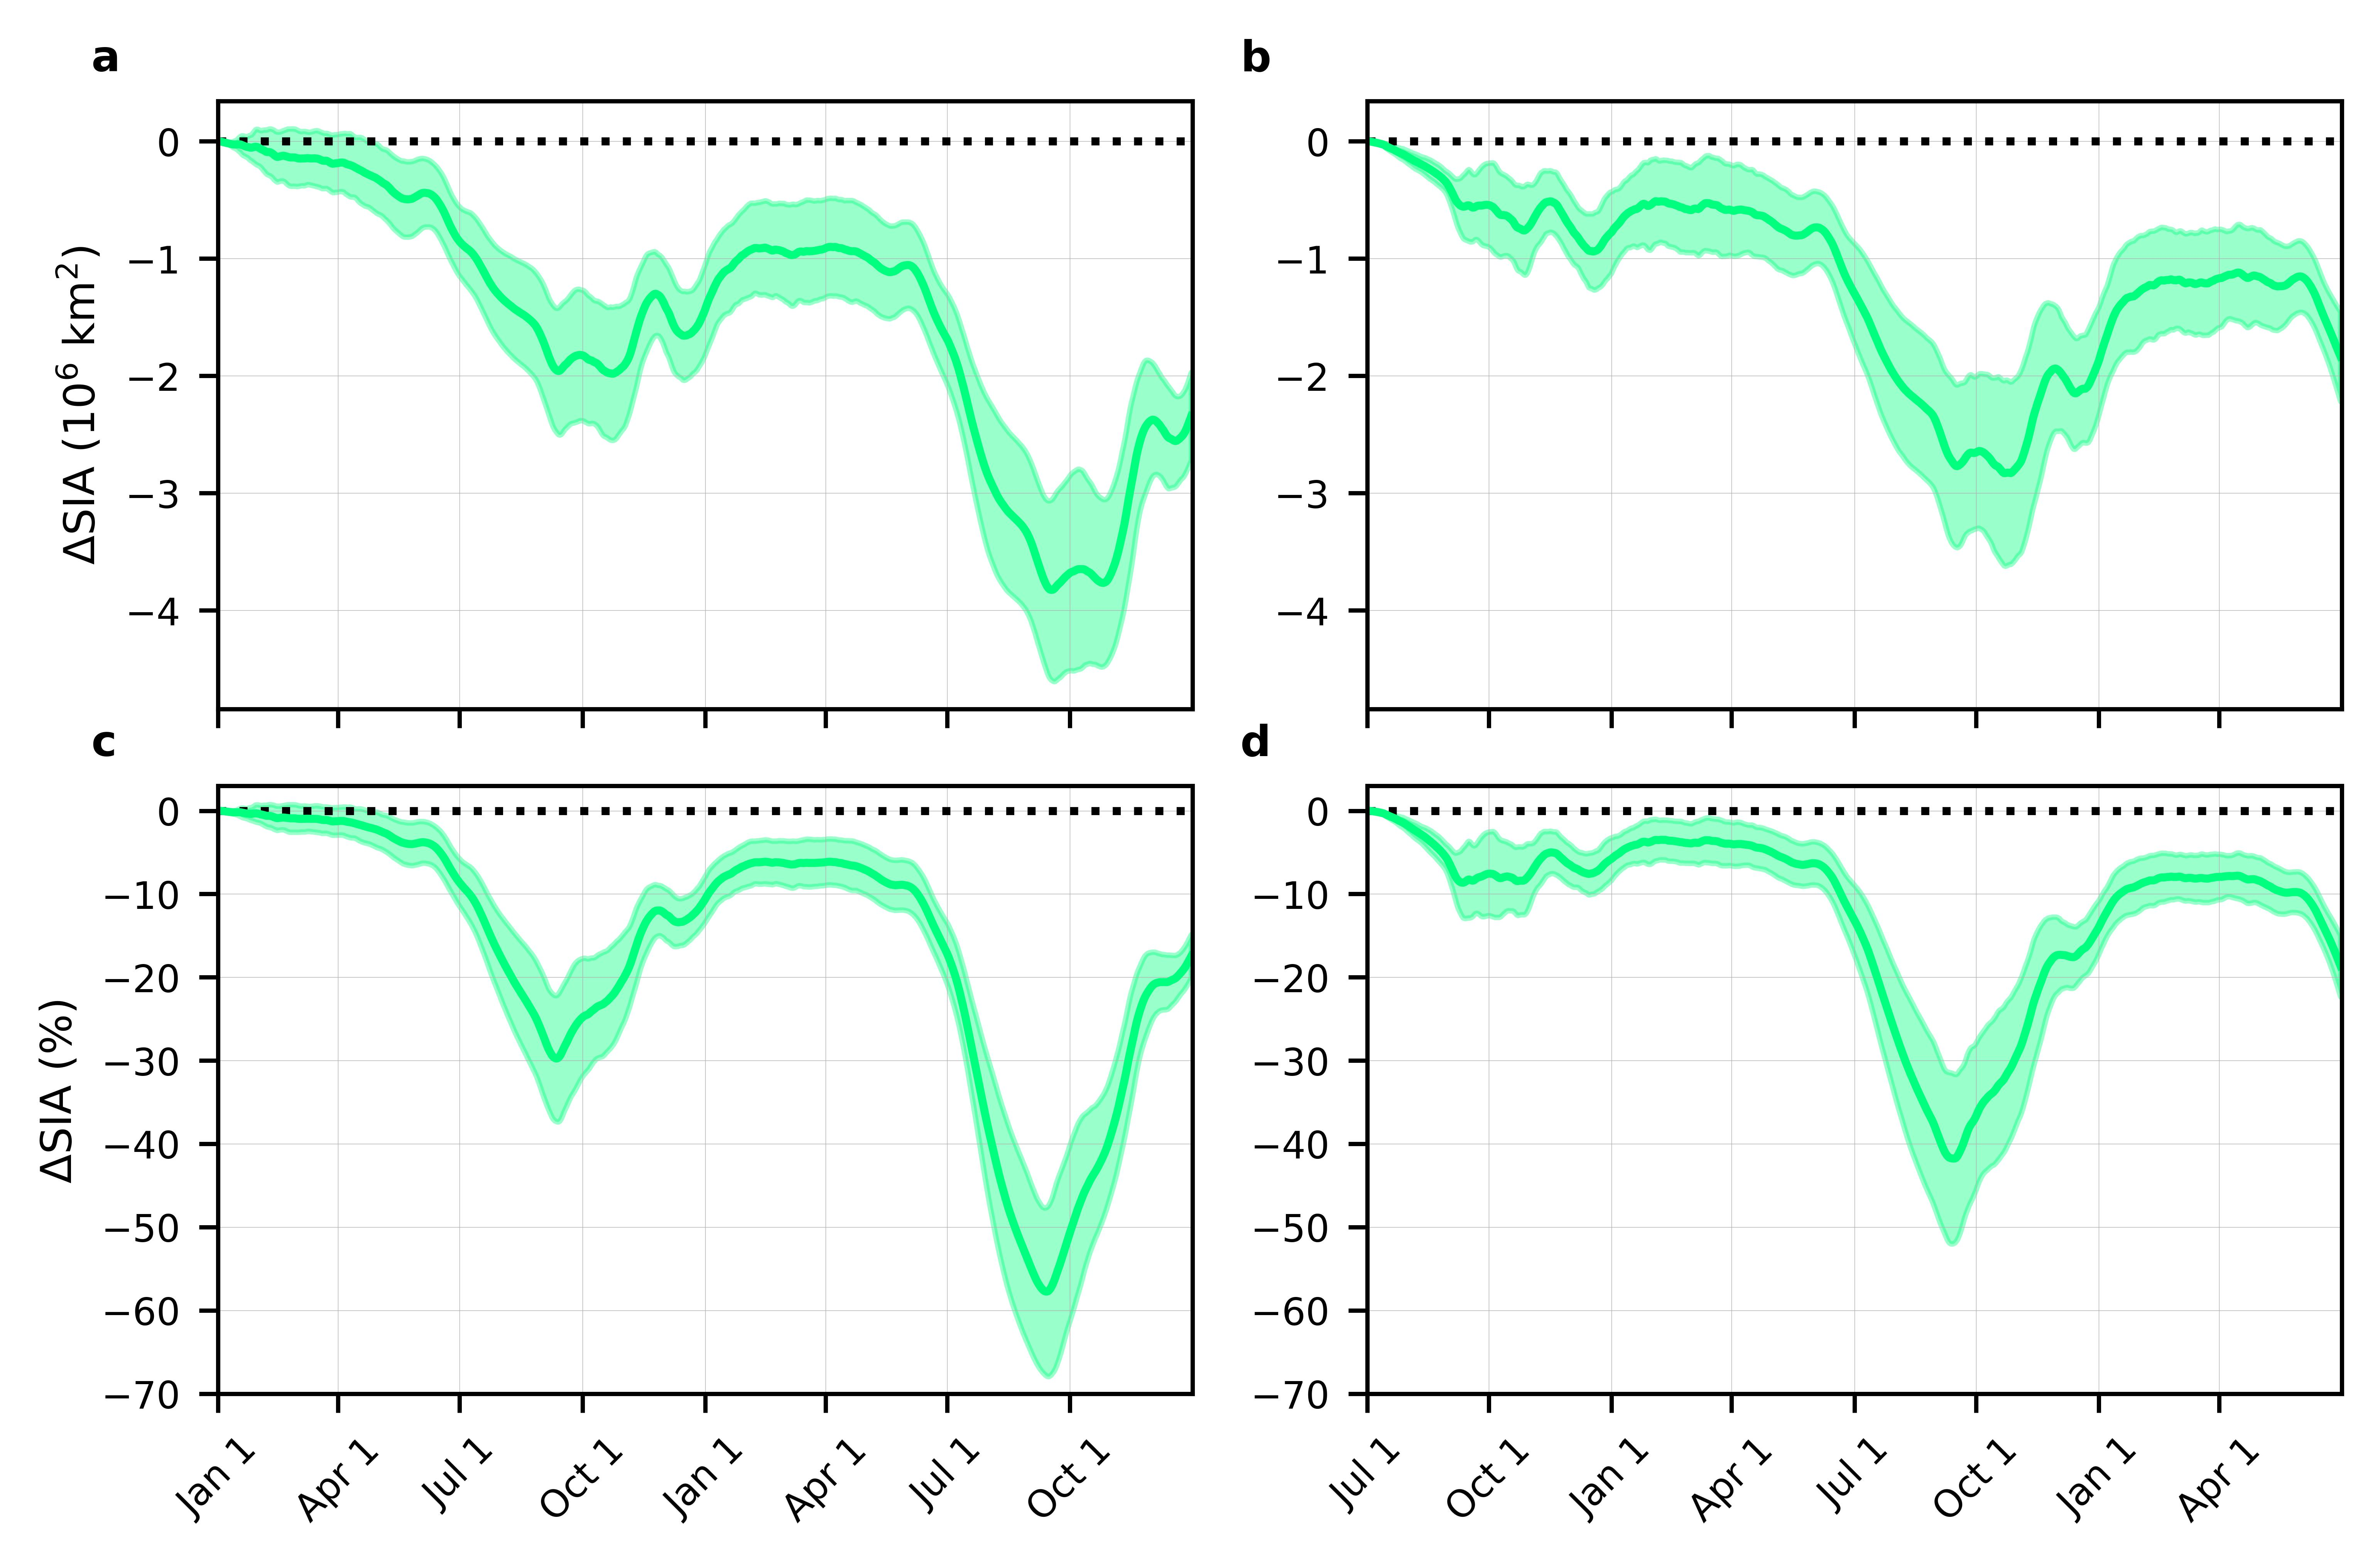

In [4]:
fig, axes = plt.subplots(ncols=2,nrows=2,sharey='row',sharex='col',figsize=(6.27,4),dpi=1000)

xs = np.arange(1,731,1)

# jan first days
first_days = np.array([1,91,182,274])

x_vals = np.concatenate((first_days,first_days+365))
x_labs = np.tile(['Jan 1','Apr 1','Jul 1','Oct 1'],
                 (2))

# july first days
first_days_jul = np.array([1,92,184,274])
x_vals_jul = np.concatenate((first_days_jul,first_days_jul+365))
x_labs_jul = np.tile(['Jul 1','Oct 1','Jan 1','Apr 1'],
                 (2))

for ax in axes.flatten():
    ax.set_xlim([1,731])
    ax.tick_params(axis='x', rotation=45,labelsize=7)
    ax.tick_params(axis='y',labelsize=7)
    ax.grid(linewidth=0.1)
    ax.tick_params(labelleft=True)
    ax.hlines(0,1,731,color='black',linestyle=':')
axes[1,0].set_xticks(x_vals)
axes[1,0].set_xticklabels(x_labs)
axes[1,1].set_xticks(x_vals_jul)
axes[1,1].set_xticklabels(x_labs_jul)
axes[0,0].set_ylabel('ΔSIA (10$^{6}$ km$^2$)',fontsize=8)
axes[1,0].set_ylabel('ΔSIA (%)',fontsize=8)

axes[0,0].plot(xs,sia_diff_abs_jan.mean(dim='ens')/1e12,color='springgreen')
axes[0,0].fill_between(xs,sia_diff_abs_jan.mean(dim='ens')/1e12-sia_diff_abs_jan.std(dim='ens')/1e12,
                 sia_diff_abs_jan.mean(dim='ens')/1e12+sia_diff_abs_jan.std(dim='ens')/1e12,color='springgreen',
                 alpha=0.4)

axes[0,1].plot(xs,sia_diff_abs_jul.mean(dim='ens')/1e12,color='springgreen')
axes[0,1].fill_between(xs,sia_diff_abs_jul.mean(dim='ens')/1e12-sia_diff_abs_jul.std(dim='ens')/1e12,
                 sia_diff_abs_jul.mean(dim='ens')/1e12+sia_diff_abs_jul.std(dim='ens')/1e12,color='springgreen',
                 alpha=0.4)

axes[1,0].plot(xs,sia_diff_perc_jan.mean(dim='ens'),color='springgreen')
axes[1,0].fill_between(xs,sia_diff_perc_jan.mean(dim='ens')-sia_diff_perc_jan.std(dim='ens'),
                 sia_diff_perc_jan.mean(dim='ens')+sia_diff_perc_jan.std(dim='ens'),color='springgreen',
                 alpha=0.4)

axes[1,1].plot(xs,sia_diff_perc_jul.mean(dim='ens'),color='springgreen')
axes[1,1].fill_between(xs,sia_diff_perc_jul.mean(dim='ens')-sia_diff_perc_jul.std(dim='ens'),
                 sia_diff_perc_jul.mean(dim='ens')+sia_diff_perc_jul.std(dim='ens'),color='springgreen',
                 alpha=0.4)
axes[1,1].set_ylim(-70,3)

letters = ['a','b','c','d','e','f']

plt.tight_layout()

for i,ax in enumerate(axes.flatten()):
    ax.text(-0.13,1.05,letters[i],transform=ax.transAxes,fontsize=8,fontweight='bold')

plt.savefig('FigS2_SIA_time_series.jpg',dpi=1000,bbox_inches='tight')
plt.show()

### Overlay plots

In [5]:
end=31

temp = sat_diff_jan.isel(time=slice(None,end)).mean(dim='time')
Δsat_jan_31 = temp.mean(dim='ens')
Δsat_jan_t_31, Δsat_jan_p_31 = stats.ttest_1samp(temp,0,axis=0,nan_policy='raise',alternative='two-sided')
# have to add a cyclic point to avoid white space at prime meridian
Δsat_jan_p_31 = add_cyclic_point(Δsat_jan_p_31,coord=Δsat_jan_31.lon.values)
Δsic_jan_31 = sic_diff_jan.isel(time=slice(None,end)).mean(dim=['time','ens']) * 100

temp = sat_diff_jul.isel(time=slice(None,end)).mean(dim='time')
Δsat_jul_31 = temp.mean(dim='ens')
Δsat_jul_t_31, Δsat_jul_p_31 = stats.ttest_1samp(temp,0,axis=0,nan_policy='raise',alternative='two-sided')
Δsat_jul_p_31 = add_cyclic_point(Δsat_jul_p_31,coord=Δsat_jul_31.lon.values)
Δsic_jul_31 = sic_diff_jul.isel(time=slice(None,end)).mean(dim=['time','ens']) * 100

maximum_31 = np.maximum(Δsat_jan_31,Δsat_jul_31)

end=90

temp = sat_diff_jan.isel(time=slice(None,end)).mean(dim='time')
Δsat_jan_90 = temp.mean(dim='ens')
Δsat_jan_t_90, Δsat_jan_p_90 = stats.ttest_1samp(temp,0,axis=0,nan_policy='raise',alternative='two-sided')
# have to add a cyclic point to avoid white space at prime meridian
Δsat_jan_p_90 = add_cyclic_point(Δsat_jan_p_90,coord=Δsat_jan_90.lon.values)
Δsic_jan_90 = sic_diff_jan.isel(time=slice(None,end)).mean(dim=['time','ens']) * 100

temp = sat_diff_jul.isel(time=slice(None,end)).mean(dim='time')
Δsat_jul_90 = temp.mean(dim='ens')
Δsat_jul_t_90, Δsat_jul_p_90 = stats.ttest_1samp(temp,0,axis=0,nan_policy='raise',alternative='two-sided')
Δsat_jul_p_90 = add_cyclic_point(Δsat_jul_p_90,coord=Δsat_jul_90.lon.values)
Δsic_jul_90 = sic_diff_jul.isel(time=slice(None,end)).mean(dim=['time','ens']) * 100

maximum_90 = np.maximum(Δsat_jan_90,Δsat_jul_90)

end=365

temp = sat_diff_jan.isel(time=slice(None,end)).mean(dim='time')
Δsat_jan_365 = temp.mean(dim='ens')
Δsat_jan_t_365, Δsat_jan_p_365 = stats.ttest_1samp(temp,0,axis=0,nan_policy='raise',alternative='two-sided')
# have to add a cyclic point to avoid white space at prime meridian
Δsat_jan_p_365 = add_cyclic_point(Δsat_jan_p_365,coord=Δsat_jan_365.lon.values)
Δsic_jan_365 = sic_diff_jan.isel(time=slice(None,end)).mean(dim=['time','ens']) * 100

temp = sat_diff_jul.isel(time=slice(None,end)).mean(dim='time')
Δsat_jul_365 = temp.mean(dim='ens')
Δsat_jul_t_365, Δsat_jul_p_365 = stats.ttest_1samp(temp,0,axis=0,nan_policy='raise',alternative='two-sided')
Δsat_jul_p_365 = add_cyclic_point(Δsat_jul_p_365,coord=Δsat_jul_365.lon.values)
Δsic_jul_365 = sic_diff_jul.isel(time=slice(None,end)).mean(dim=['time','ens']) * 100

maximum_365 = np.maximum(Δsat_jan_365,Δsat_jul_365)

/tmp/ipykernel_4141/767959353.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


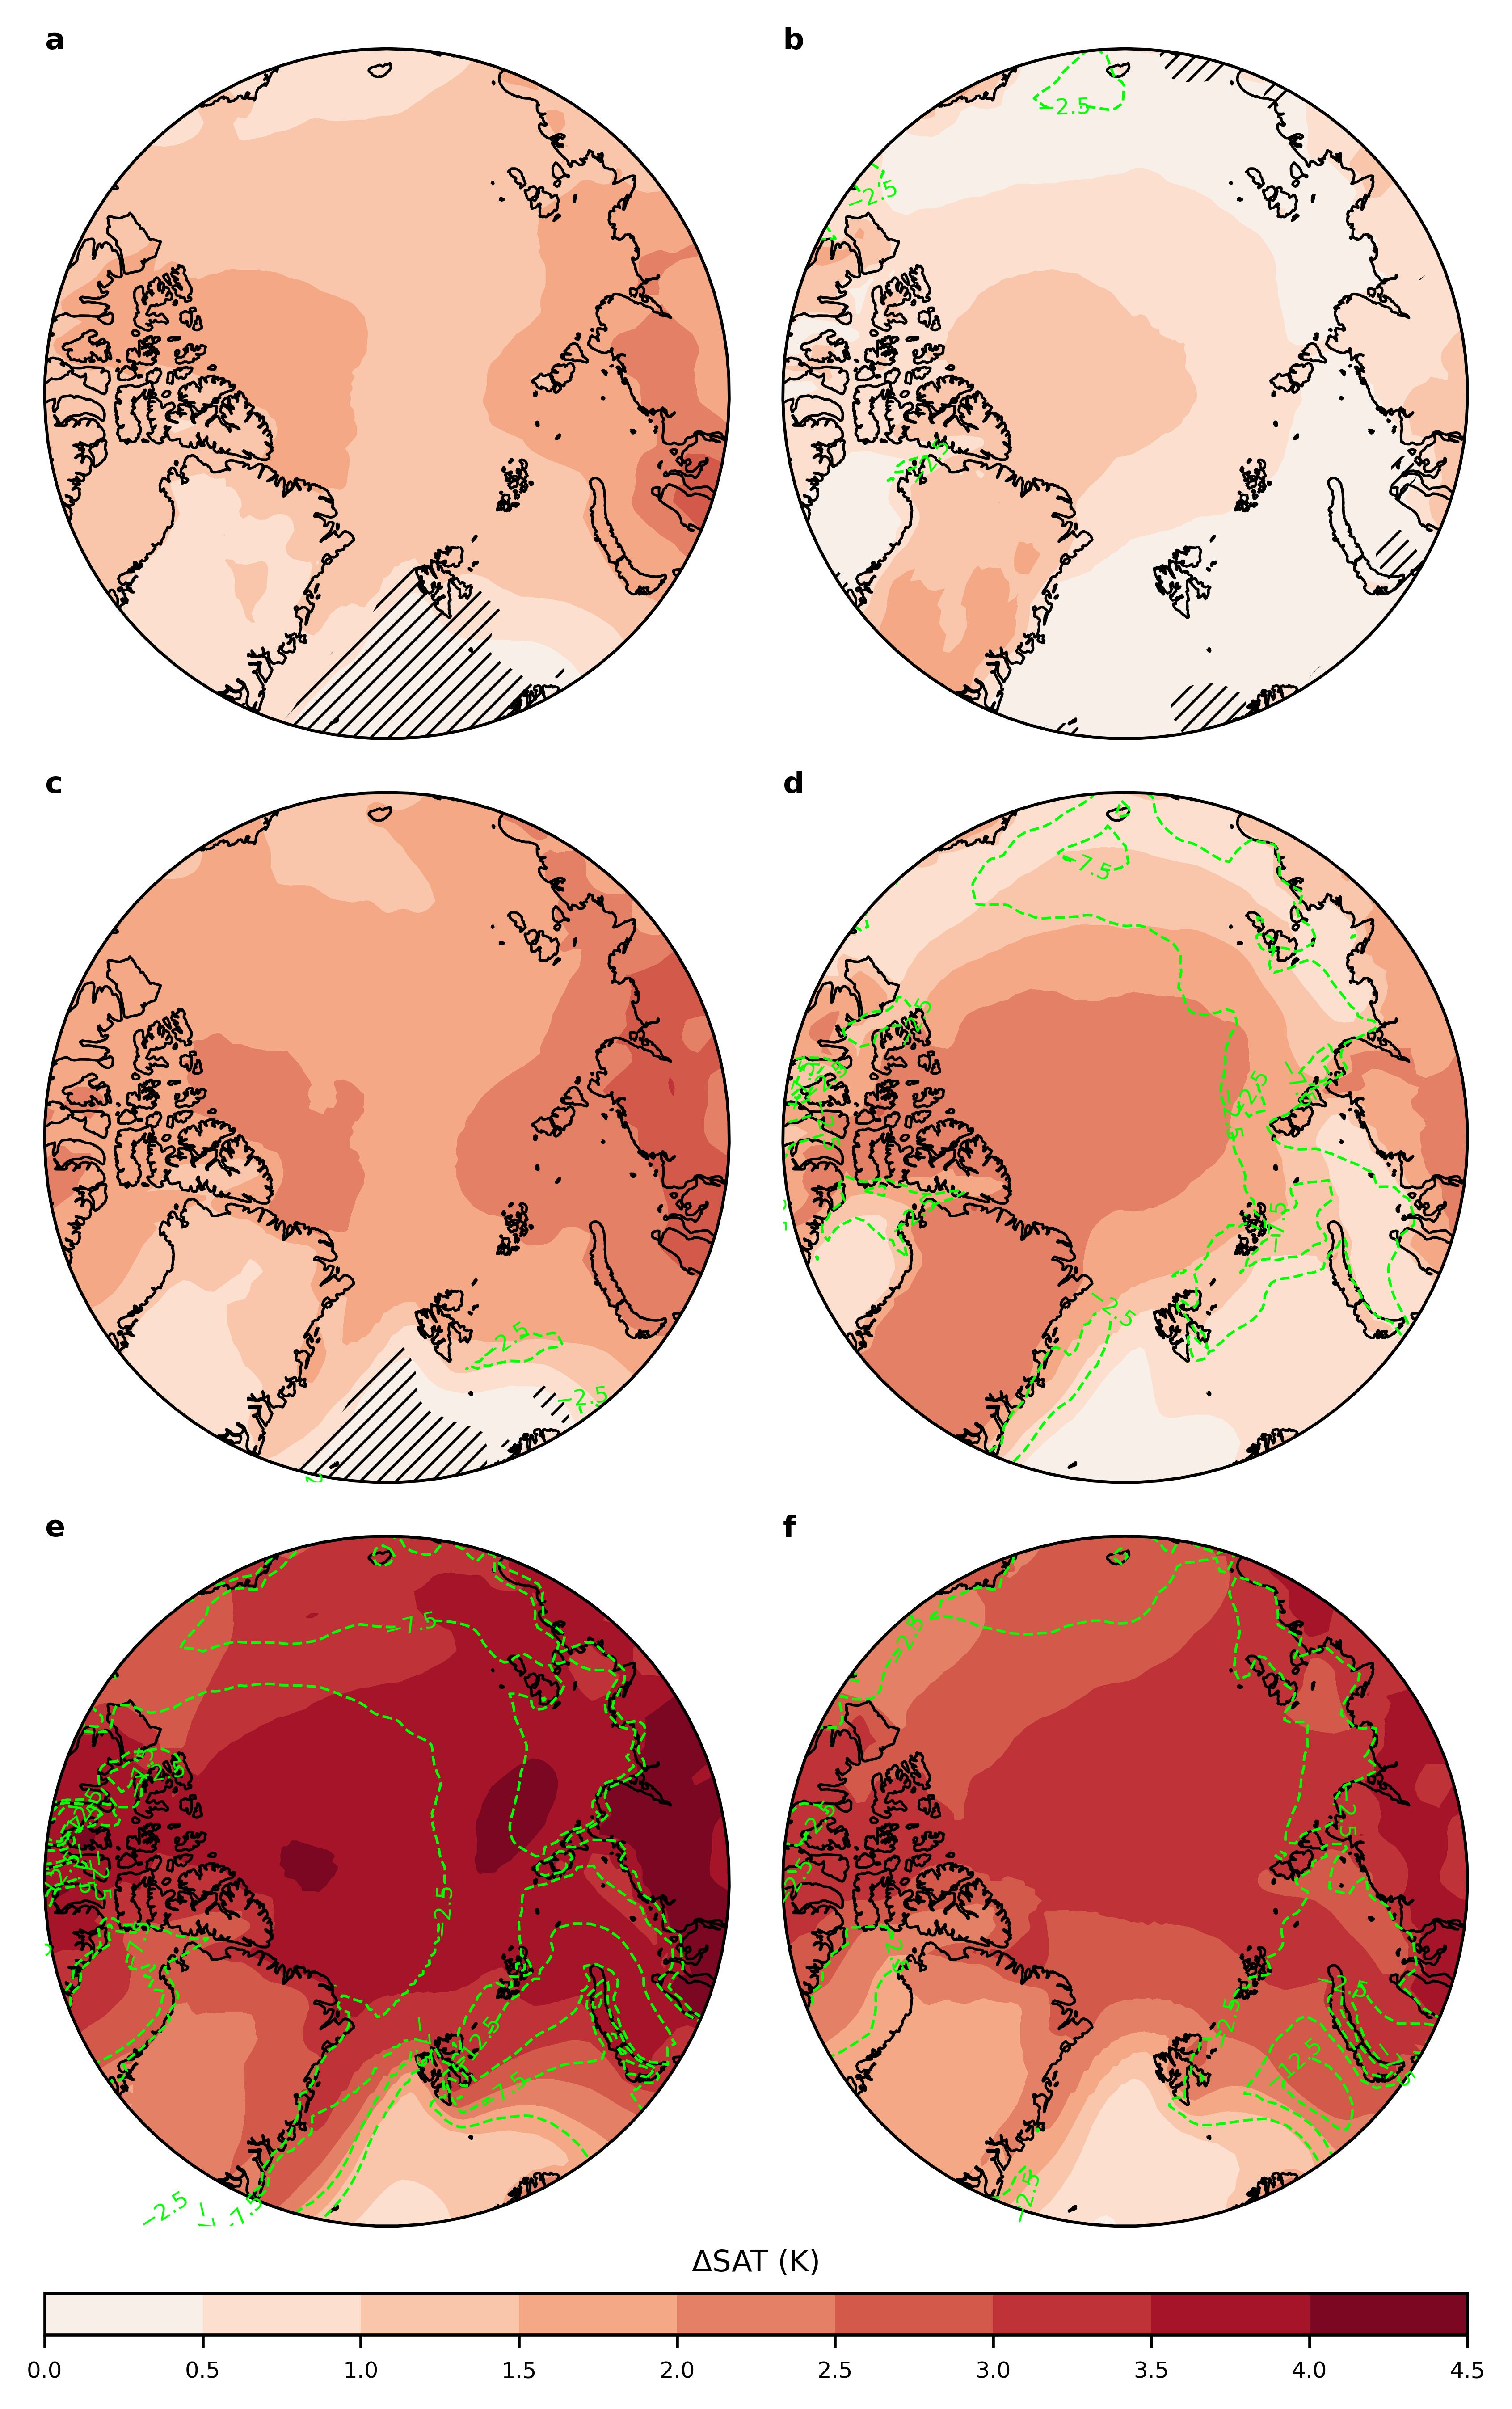

In [7]:
mpl.rcParams['hatch.linewidth'] = 0.7

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

projection = ccrs.NorthPolarStereo()

axes_class = (GeoAxes,
              dict(map_projection=projection))

fig = plt.figure(figsize=(6,9),dpi=600)
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(3, 2),
                axes_pad=0.2,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=0.05,
                cbar_size='3%',
                label_mode='',
                share_all=True)  # note the empty label_mode

for i,ax in enumerate(axgr):
    ax.coastlines(linewidth=0.7)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_extent([-180, 180, 70, 90], ccrs.PlateCarree())

levs = np.arange(0,4.6,0.5)
cf0 = axgr[0].contourf(Δsat_jan_p_31[1],Δsat_jan_31.lat,
                       add_cyclic_point(Δsat_jan_31,coord=Δsat_jan_31.lon.values)[0],
                       levels=levs,transform=ccrs.PlateCarree(),
                       norm=colors.CenteredNorm(),cmap='RdBu_r')
axgr[0].contourf(Δsat_jan_p_31[1],Δsat_jan_31.lat.values,
             Δsat_jan_p_31[0],levels=[0,0.05,1],colors='none',hatches=[None,'/////'],
            transform=ccrs.PlateCarree())
cp0 = axgr[0].contour(Δsic_jan_31.lon,Δsic_jan_31.lat,Δsic_jan_31,
                      transform=ccrs.PlateCarree(),colors='lime',
                  levels=np.arange(-102.5,101,5),linewidths=0.7)
cb0 = axgr.cbar_axes[0].colorbar(cf0)
cb0.ax.tick_params(labelsize=6)
cb0.ax.set_title('ΔSAT (K)',fontsize=8)

cf1 = axgr[1].contourf(Δsat_jan_p_31[1],Δsat_jul_31.lat,
                       add_cyclic_point(Δsat_jul_31,coord=Δsat_jul_31.lon.values)[0],
                       levels=levs,transform=ccrs.PlateCarree(),
                       norm=colors.CenteredNorm(),cmap='RdBu_r')
axgr[1].contourf(Δsat_jul_p_31[1],Δsat_jul_31.lat.values,
             Δsat_jul_p_31[0],levels=[0,0.05,1],colors='none',hatches=[None,'/////'],
            transform=ccrs.PlateCarree())
# cb1 = axgr.cbar_axes[1].colorbar(cf1)
cp1 = axgr[1].contour(Δsic_jul_31.lon,Δsic_jul_31.lat,Δsic_jul_31,
                      transform=ccrs.PlateCarree(),colors='lime',
                  levels=np.arange(-102.5,101,5),linewidths=0.7)
axgr[1].clabel(cp1,inline=True,fontsize=6)
# cb1.ax.tick_params(labelsize=6)

cf2 = axgr[2].contourf(Δsat_jan_p_90[1],Δsat_jan_90.lat,
                       add_cyclic_point(Δsat_jan_90,coord=Δsat_jan_90.lon.values)[0],
                       levels=levs,transform=ccrs.PlateCarree(),
                       norm=colors.CenteredNorm(),cmap='RdBu_r')
axgr[2].contourf(Δsat_jan_p_90[1],Δsat_jan_90.lat.values,
             Δsat_jan_p_90[0],levels=[0,0.05,1],colors='none',hatches=[None,'/////'],
            transform=ccrs.PlateCarree())
cp2 = axgr[2].contour(Δsic_jan_90.lon,Δsic_jan_90.lat,Δsic_jan_90,
                      transform=ccrs.PlateCarree(),colors='lime',
                  levels=np.arange(-102.5,101,5),linewidths=0.7)
# cb2 = axgr.cbar_axes[2].colorbar(cf2)
axgr[2].clabel(cp2,inline=True,fontsize=6)
# cb2.ax.tick_params(labelsize=6)

cf3 = axgr[3].contourf(Δsat_jan_p_90[1],Δsat_jul_90.lat,
                       add_cyclic_point(Δsat_jul_90,coord=Δsat_jul_90.lon.values)[0],
                       levels=levs,transform=ccrs.PlateCarree(),
                       norm=colors.CenteredNorm(),cmap='RdBu_r')
axgr[3].contourf(Δsat_jul_p_90[1],Δsat_jul_90.lat.values,
             Δsat_jul_p_90[0],levels=[0,0.05,1],colors='none',hatches=[None,'/////'],
            transform=ccrs.PlateCarree())
# cb3 = axgr.cbar_axes[3].colorbar(cf3)
cp3 = axgr[3].contour(Δsic_jul_90.lon,Δsic_jul_90.lat,Δsic_jul_90,
                      transform=ccrs.PlateCarree(),colors='lime',
                  levels=np.arange(-102.5,101,5),linewidths=0.7)
axgr[3].clabel(cp3,inline=True,fontsize=6)
# cb3.ax.tick_params(labelsize=6)

cf4 = axgr[4].contourf(Δsat_jan_p_365[1],Δsat_jan_365.lat,
                       add_cyclic_point(Δsat_jan_365,coord=Δsat_jan_365.lon.values)[0],
                       levels=levs,transform=ccrs.PlateCarree(),
                       norm=colors.CenteredNorm(),cmap='RdBu_r')
axgr[4].contourf(Δsat_jan_p_365[1],Δsat_jan_365.lat.values,
             Δsat_jan_p_365[0],levels=[0,0.05,1],colors='none',hatches=[None,'/////'],
            transform=ccrs.PlateCarree())
cp4 = axgr[4].contour(Δsic_jan_365.lon,Δsic_jan_365.lat,Δsic_jan_365,
                      transform=ccrs.PlateCarree(),colors='lime',
                  levels=np.arange(-102.5,101,5),linewidths=0.7)
# cb4 = axgr.cbar_axes[4].colorbar(cf4)
axgr[4].clabel(cp4,inline=True,fontsize=6)
# cb4.ax.tick_params(labelsize=6)

cf5 = axgr[5].contourf(Δsat_jan_p_365[1],Δsat_jul_365.lat,
                       add_cyclic_point(Δsat_jul_365,coord=Δsat_jul_365.lon.values)[0],
                       levels=levs,transform=ccrs.PlateCarree(),
                       norm=colors.CenteredNorm(),cmap='RdBu_r')
axgr[5].contourf(Δsat_jul_p_365[1],Δsat_jul_365.lat.values,
             Δsat_jul_p_365[0],levels=[0,0.05,1],colors='none',hatches=[None,'/////'],
            transform=ccrs.PlateCarree())
# cb5 = axgr.cbar_axes[5].colorbar(cf5)
cp5 = axgr[5].contour(Δsic_jul_365.lon,Δsic_jul_365.lat,Δsic_jul_365,
                      transform=ccrs.PlateCarree(),colors='lime',
                  levels=np.arange(-102.5,101,5),linewidths=0.7)
axgr[5].clabel(cp5,inline=True,fontsize=6)
# cb5.ax.tick_params(labelsize=6)
    
plt.tight_layout()
# plt.savefig('Fig2_spatial_map.jpg',dpi=600,bbox_inches='tight')
# plt.text(0,0,'a',fontweight='bold',fontsize=8,transform=axgr[0].transAxes)
letters = ['a','b','c','d','e','f']
for i,ax in enumerate(axgr):
    ax.text(0,1,letters[i],transform=ax.transAxes,fontsize=8,fontweight='bold')
plt.savefig('Fig2_spatial_maps.jpg',dpi=600,bbox_inches='tight')
plt.show()